In [24]:
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from scipy import stats
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

In [25]:
socioeconomic_df = pd.read_csv('Census.csv',engine = 'c')
crimes_df=pd.read_csv('Crimes.csv',engine = 'c')
police_station_df=pd.read_csv('Police_Stations.csv',engine = 'c')

In [26]:
socioeconomic_df.shape

(78, 9)

In [27]:
crimes_df.shape

(2174039, 22)

In [28]:
police_station_df.shape

(23, 15)

In [29]:
socioeconomic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
Community Area Number                           77 non-null float64
COMMUNITY AREA NAME                             78 non-null object
PERCENT OF HOUSING CROWDED                      78 non-null float64
PERCENT HOUSEHOLDS BELOW POVERTY                78 non-null float64
PERCENT AGED 16+ UNEMPLOYED                     78 non-null float64
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    78 non-null float64
PERCENT AGED UNDER 18 OR OVER 64                78 non-null float64
PER CAPITA INCOME                               78 non-null int64
HARDSHIP INDEX                                  77 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [30]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174039 entries, 0 to 2174038
Data columns (total 22 columns):
ID                      object
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  object
Domestic                object
Beat                    float64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    float64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: float64(9), object(13)
memory usage: 364.9+ MB


In [31]:
police_station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 15 columns):
DISTRICT         23 non-null object
DISTRICT NAME    23 non-null object
ADDRESS          23 non-null object
CITY             23 non-null object
STATE            23 non-null object
ZIP              23 non-null int64
WEBSITE          23 non-null object
PHONE            22 non-null object
FAX              22 non-null object
TTY              22 non-null object
X COORDINATE     23 non-null float64
Y COORDINATE     23 non-null float64
LATITUDE         23 non-null float64
LONGITUDE        23 non-null float64
LOCATION         23 non-null object
dtypes: float64(4), int64(1), object(10)
memory usage: 2.8+ KB


In [32]:
socioeconomic_df.head(5)

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [33]:
crimes_df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015.0,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015.0,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015.0,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015.0,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [34]:
police_station_df.head(100)

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,NaN,NaN,NaN,1177731.401,1881697.404,41.830702,-87.623395,"(41.8307016873, -87.6233953459)"
1,18,Near North,1160 N Larrabee St,Chicago,IL,60610,http://home.chicagopolice.org/community/distri...,312-742-5870,312-742-5771,312-742-5773,1172080.029,1908086.527,41.903242,-87.643352,"(41.9032416531, -87.6433521393)"
2,19,Town Hall,850 W Addison St,Chicago,IL,60613,http://home.chicagopolice.org/community/distri...,312-744-8320,312-744-4481,312-744-8011,1169730.744,1924160.317,41.947400,-87.651512,"(41.9474004564, -87.651512018)"
3,20,Lincoln,5400 N Lincoln Ave,Chicago,IL,60625,http://home.chicagopolice.org/community/distri...,312-742-8714,312-742-8803,312-742-8841,1158399.146,1935788.826,41.979550,-87.692845,"(41.9795495131, -87.6928445094)"
4,22,Morgan Park,1900 W Monterey Ave,Chicago,IL,60643,http://home.chicagopolice.org/community/distri...,312-745-0710,312-745-0814,312-745-0569,1165825.476,1830851.333,41.691435,-87.668520,"(41.6914347795, -87.6685203937)"
5,24,Rogers Park,6464 N Clark St,Chicago,IL,60626,http://home.chicagopolice.org/community/distri...,312-744-5907,312-744-6928,312-744-7603,1164193.588,1943199.401,41.999763,-87.671324,"(41.9997634842, -87.6713242922)"
6,25,Grand Central,5555 W Grand Ave,Chicago,IL,60639,http://home.chicagopolice.org/community/distri...,312-746-8605,312-746-4353,312-746-8383,1138770.871,1913442.439,41.918609,-87.765574,"(41.9186088912, -87.765574479)"
7,1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/distri...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"(41.8583725929, -87.627356171)"
8,2,Wentworth,5101 S Wentworth Ave,Chicago,IL,60609,http://home.chicagopolice.org/community/distri...,312-747-8366,312-747-5396,312-747-6656,1175864.837,1871153.753,41.801811,-87.630560,"(41.8018110912, -87.6305601801)"
9,3,Grand Crossing,7040 S Cottage Grove Ave,Chicago,IL,60637,http://home.chicagopolice.org/community/distri...,312-747-8201,312-747-5479,312-747-9168,1182739.183,1858317.732,41.766431,-87.605748,"(41.7664308925, -87.6057478606)"


In [35]:
crimes_df.columns = crimes_df.columns.str.replace(' ', '')
crimes_df.columns = crimes_df.columns.str.lower()
crimes_columns=list(crimes_df.columns)
crimes_columns

['id',
 'casenumber',
 'date',
 'block',
 'iucr',
 'primarytype',
 'description',
 'locationdescription',
 'arrest',
 'domestic',
 'beat',
 'district',
 'ward',
 'communityarea',
 'fbicode',
 'xcoordinate',
 'ycoordinate',
 'year',
 'updatedon',
 'latitude',
 'longitude',
 'location']

In [36]:
socioeconomic_df.columns = socioeconomic_df.columns.str.replace(' ', '')
socioeconomic_df.columns = socioeconomic_df.columns.str.lower()
socioeconomic_columns=list(socioeconomic_df.columns)
socioeconomic_columns

['communityareanumber',
 'communityareaname',
 'percentofhousingcrowded',
 'percenthouseholdsbelowpoverty',
 'percentaged16+unemployed',
 'percentaged25+withouthighschooldiploma',
 'percentagedunder18orover64',
 'percapitaincome',
 'hardshipindex']

In [37]:
police_station_df.columns = police_station_df.columns.str.replace(' ', '')
police_station_df.columns = police_station_df.columns.str.lower()
police_station_columns=list(police_station_df.columns)
police_station_columns

['district',
 'districtname',
 'address',
 'city',
 'state',
 'zip',
 'website',
 'phone',
 'fax',
 'tty',
 'xcoordinate',
 'ycoordinate',
 'latitude',
 'longitude',
 'location']

# Data Preprocessing

In [38]:
crimes_df.drop(['location'],axis=1,inplace=True)
crimes_df.head()

,id,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,domestic,...,district,ward,communityarea,fbicode,xcoordinate,ycoordinate,year,updatedon,latitude,longitude
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,02/10/2018 03:50:01 PM,41.815117,-87.670000
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,15.0,29.0,25.0,06,1138875.0,1904869.0,2015.0,02/10/2018 03:50:01 PM,41.895080,-87.765400
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,6.0,8.0,44.0,06,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,14.0,35.0,21.0,18,1152037.0,1920384.0,2015.0,02/10/2018 03:50:01 PM,41.937406,-87.716650
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015.0,02/10/2018 03:50:01 PM,41.881903,-87.755121


# Removing null values

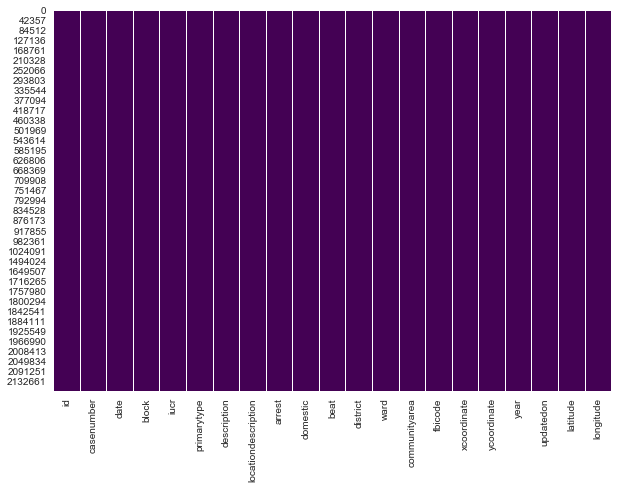

In [39]:
crimes_df=crimes_df.dropna()
plt.figure(figsize=(10,7))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(crimes_df.isnull(), cbar = False,cmap="viridis")

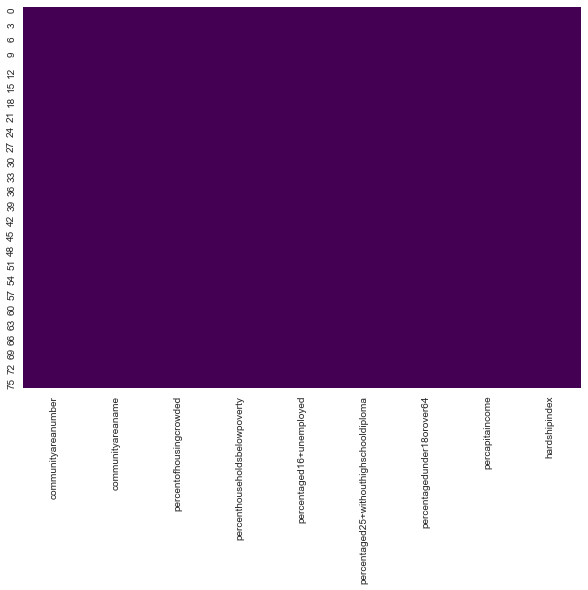

In [40]:
socioeconomic_df=socioeconomic_df.dropna()
plt.figure(figsize=(10,7))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(socioeconomic_df.isnull(), cbar = False,cmap="viridis")

# Making the date time in python format

In [41]:
crimes_df.date=pd.to_datetime(crimes_df.date,format='%m/%d/%Y %I:%M:%S %p')
crimes_df.index = pd.DatetimeIndex(crimes_df.date)

# Dropping non important columns

In [42]:
crimes_df=crimes_df.drop(["casenumber", "domestic", "beat"], 1)
crimes_df.head()

,id,date,block,iucr,primarytype,description,locationdescription,arrest,district,ward,communityarea,fbicode,xcoordinate,ycoordinate,year,updatedon,latitude,longitude
date,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,02/10/2018 03:50:01 PM,41.815117,-87.670000
2015-09-04 11:30:00,10224739,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,15.0,29.0,25.0,06,1138875.0,1904869.0,2015.0,02/10/2018 03:50:01 PM,41.895080,-87.765400
2015-09-05 12:45:00,10224740,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,14.0,35.0,21.0,18,1152037.0,1920384.0,2015.0,02/10/2018 03:50:01 PM,41.937406,-87.716650
2015-09-05 13:00:00,10224741,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015.0,02/10/2018 03:50:01 PM,41.881903,-87.755121
2015-09-05 10:55:00,10224742,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,6.0,21.0,71.0,05,1168430.0,1850165.0,2015.0,02/10/2018 03:50:01 PM,41.744379,-87.658431


In [43]:
police_station_df=police_station_df.drop(['address','city','zip','location','website','phone', 'fax','tty', 'xcoordinate', 'ycoordinate'],axis=1)
police_station_df.head(5)

,district,districtname,state,latitude,longitude
0,Headquarters,Headquarters,IL,41.830702,-87.623395
1,18,Near North,IL,41.903242,-87.643352
2,19,Town Hall,IL,41.947400,-87.651512
3,20,Lincoln,IL,41.979550,-87.692845
4,22,Morgan Park,IL,41.691435,-87.668520


# Distance between crime location and police station

In [44]:
police_station_df.head()

,district,districtname,state,latitude,longitude
0,Headquarters,Headquarters,IL,41.830702,-87.623395
1,18,Near North,IL,41.903242,-87.643352
2,19,Town Hall,IL,41.947400,-87.651512
3,20,Lincoln,IL,41.979550,-87.692845
4,22,Morgan Park,IL,41.691435,-87.668520


In [45]:
crimes_df.head()

,id,date,block,iucr,primarytype,description,locationdescription,arrest,district,ward,communityarea,fbicode,xcoordinate,ycoordinate,year,updatedon,latitude,longitude
date,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,02/10/2018 03:50:01 PM,41.815117,-87.670000
2015-09-04 11:30:00,10224739,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,15.0,29.0,25.0,06,1138875.0,1904869.0,2015.0,02/10/2018 03:50:01 PM,41.895080,-87.765400
2015-09-05 12:45:00,10224740,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,14.0,35.0,21.0,18,1152037.0,1920384.0,2015.0,02/10/2018 03:50:01 PM,41.937406,-87.716650
2015-09-05 13:00:00,10224741,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015.0,02/10/2018 03:50:01 PM,41.881903,-87.755121
2015-09-05 10:55:00,10224742,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,6.0,21.0,71.0,05,1168430.0,1850165.0,2015.0,02/10/2018 03:50:01 PM,41.744379,-87.658431


In [55]:
crime_locations=np.array(list(zip(np.array(crimes_df.latitude),np.array(crimes_df.longitude))))
police_stn=np.array(list(zip(np.array(police_station_df.latitude),np.array(police_station_df.longitude)))) 

In [56]:
print(crime_locations)
print(police_stn)

[[ 41.81511728 -87.66999956]
 [ 41.89508047 -87.76540045]
 [ 41.93740577 -87.71664969]
 ...
 [ 41.92725647 -87.71950722]
 [ 41.86202529 -87.66625873]
 [ 41.91244354 -87.74474591]]
[[ 41.83070169 -87.62339535]
 [ 41.90324165 -87.64335214]
 [ 41.94740046 -87.65151202]
 [ 41.97954951 -87.69284451]
 [ 41.69143478 -87.66852039]
 [ 41.99976348 -87.67132429]
 [ 41.91860889 -87.76557448]
 [ 41.85837259 -87.62735617]
 [ 41.80181109 -87.63056018]
 [ 41.76643089 -87.60574786]
 [ 41.70793329 -87.56834912]
 [ 41.69272336 -87.60450587]
 [ 41.75213684 -87.64422891]
 [ 41.77963154 -87.66088702]
 [ 41.77898719 -87.70886382]
 [ 41.83739443 -87.64640771]
 [ 41.85668453 -87.70838196]
 [ 41.87358229 -87.70548813]
 [ 41.86297662 -87.65697251]
 [ 41.92110332 -87.69745182]
 [ 41.88008346 -87.76819989]
 [ 41.97409445 -87.76614884]
 [ 41.96605342 -87.72811456]]


In [57]:
from math import radians, sin, cos, atan2,sqrt
'''
haversine formula
a = sin²(φB - φA/2) + cos φA * cos φB * sin²(λB - λA/2)
c = 2 * atan2( √a, √(1−a) )
d = R ⋅ c

'''
def calculate_Distance(crime_location, police_station):
    print(crime_location)
    radius=6371000 #in meters
    print(police_station)
    lat_delta = np.radians(police_station[:,0]) -radians(crime_location[0]) #delta phi
    long_delta = np.radians(police_station[:,1]) - radians(crime_location[1])#delta lambda
    
    #haversine distance
    
    a = sin(lat_delta/2) * sin(lat_delta/2) + cos(radians(police_station[:,0]))\
    * cos(radians(crime_location[0])) * sin(long_delta/2) * sin(long_delta/2)
   
    c = 2 * atan2(sqrt(a) , sqrt(1 - a))
    
    delta_distance = round((radius * c /1000),3) #final distance in km
    return min(delta_distance)

In [58]:
closest_police_stn=[]
print(crime_locations)
for crime_point in crime_locations:
    delta_dist=calculate_Distance(crime_point,police_stn)
    closest_police_stn.append(delta_dist)
closest_police_stn

[[ 41.81511728 -87.66999956]
 [ 41.89508047 -87.76540045]
 [ 41.93740577 -87.71664969]
 ...
 [ 41.92725647 -87.71950722]
 [ 41.86202529 -87.66625873]
 [ 41.91244354 -87.74474591]]
[ 41.81511728 -87.66999956]
[[ 41.83070169 -87.62339535]
 [ 41.90324165 -87.64335214]
 [ 41.94740046 -87.65151202]
 [ 41.97954951 -87.69284451]
 [ 41.69143478 -87.66852039]
 [ 41.99976348 -87.67132429]
 [ 41.91860889 -87.76557448]
 [ 41.85837259 -87.62735617]
 [ 41.80181109 -87.63056018]
 [ 41.76643089 -87.60574786]
 [ 41.70793329 -87.56834912]
 [ 41.69272336 -87.60450587]
 [ 41.75213684 -87.64422891]
 [ 41.77963154 -87.66088702]
 [ 41.77898719 -87.70886382]
 [ 41.83739443 -87.64640771]
 [ 41.85668453 -87.70838196]
 [ 41.87358229 -87.70548813]
 [ 41.86297662 -87.65697251]
 [ 41.92110332 -87.69745182]
 [ 41.88008346 -87.76819989]
 [ 41.97409445 -87.76614884]
 [ 41.96605342 -87.72811456]]


TypeError: only size-1 arrays can be converted to Python scalars